## Manual Updates to file:
- Convert excel file with three tabs to 3 CSV files
- Put dependent and independent variables in same file.
- Update column names for easier modelling
    - Replace space with _ to ensure easier readability

## Data Preprocessing
1. Convert all -1 to 0.
2. Remove Skewness from the data

## Data Analysis:
1. Check number of unique values
2. Check if missing values
3. Check Std. Deviation, min, max, quantiles etc

## Variable Description
    Var 1	Integer (min=0, no max)
    Var 2	Real (min=0, no max)
    Var 3	Integer (min=0, no max)
    Var 4	Real (Negative value possible though unlikely, no max)
    Var 5	One of 8 classes (so -1 here means not in that class)
    Var 6	One of 12 classes (so -1 here means not in that class)	
    Var 7	Integer
    Var 8	Integer
    Var 9	Integer
    Var 10	Integer
    Var 11	Real (no min or max)
    Var 12	Real (no min or max)
    Var 13	Integer (min=2, no max)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To plot QQ plot
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [2]:
# To view all the columns 
pd.set_option("display.max_columns", None)

In [3]:
data = pd.read_csv('DS1_Dependent_2_xl.csv')

In [4]:
data.head()

,Var_1,Var_2,Var_3,Var_4,Var_5_Class_1,Var_5_Class_2,Var_5_Class_3,Var_5_Class_4,Var_5_Class_5,Var_5_Class_6,Var_5_Class_7,Var_5_Class_8,Var_6_Class_1,Var_6_Class_2,Var_6_Class_3,Var_6_Class_4,Var_6_Class_5,Var_6_Class_6,Var_6_Class_7,Var_6_Class_8,Var_6_Class_9,Var_6_Class_10,Var_6_Class_11,Var_6_Class_12,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Input_Data_Set_2
0,5,0.933060,63,15.566940,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,39.737157,28.386285,2,1.0
1,8,2.124317,18,14.375683,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,2,-1,-1,39.737157,28.386285,2,0.0
2,18,1.618852,53,14.881148,-1,-1,-1,-1,-1,-1,1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,39.737157,28.386285,2,1.0
3,11,1.005464,12,15.494536,-1,-1,-1,-1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,1,0,-1,-1,39.737157,28.386285,2,1.0
4,12,1.008197,11,14.274590,-1,-1,-1,-1,-1,-1,-1,1,-1,-1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,2,0,-1,-1,39.737157,28.386285,2,1.0


## Data Analysis

In [5]:
# Check shape of the data
data.shape

(1649, 32)

In [6]:
# Check how many unique values are there is the data. Helps to understand which column can be set as categorical vs numeric
data.nunique()

Var_1                 52
Var_2               1007
Var_3                 85
Var_4               1379
Var_5_Class_1          2
Var_5_Class_2          2
Var_5_Class_3          2
Var_5_Class_4          2
Var_5_Class_5          1
Var_5_Class_6          2
Var_5_Class_7          2
Var_5_Class_8          2
Var_6_Class_1          2
Var_6_Class_2          2
Var_6_Class_3          2
Var_6_Class_4          2
Var_6_Class_5          2
Var_6_Class_6          2
Var_6_Class_7          2
Var_6_Class_8          2
Var_6_Class_9          2
Var_6_Class_10         2
Var_6_Class_11         2
Var_6_Class_12         2
Var_7                  6
Var_8                 13
Var_9                  2
Var_10                 2
Var_11                15
Var_12                15
Var_13                15
Input_Data_Set_2       2
dtype: int64

In [7]:
# Check if there are any null values
data.isnull().sum()

Var_1                 0
Var_2                 0
Var_3                 0
Var_4                 0
Var_5_Class_1         0
Var_5_Class_2         0
Var_5_Class_3         0
Var_5_Class_4         0
Var_5_Class_5         0
Var_5_Class_6         0
Var_5_Class_7         0
Var_5_Class_8         0
Var_6_Class_1         0
Var_6_Class_2         0
Var_6_Class_3         0
Var_6_Class_4         0
Var_6_Class_5         0
Var_6_Class_6         0
Var_6_Class_7         0
Var_6_Class_8         0
Var_6_Class_9         0
Var_6_Class_10        0
Var_6_Class_11        0
Var_6_Class_12        0
Var_7                 0
Var_8                 0
Var_9                 0
Var_10                0
Var_11                0
Var_12                0
Var_13                0
Input_Data_Set_2    385
dtype: int64

## Data Preprocessing

We need to convert all -1 to 0 to help machine understand it better

In [8]:
# Saving all the columns which have -1 and 0 values in data_columns variable
data_columns = ['Var_5_Class_1', 'Var_5_Class_2','Var_5_Class_3', 'Var_5_Class_4', 'Var_5_Class_5', 'Var_5_Class_6','Var_5_Class_7', 'Var_5_Class_8', 'Var_6_Class_1', 'Var_6_Class_2', 'Var_6_Class_3', 'Var_6_Class_4', 'Var_6_Class_5', 'Var_6_Class_6','Var_6_Class_7', 'Var_6_Class_8', 'Var_6_Class_9', 'Var_6_Class_10','Var_6_Class_11', 'Var_6_Class_12', 'Var_9', 'Var_10']

In [9]:
# Creating a function to convert all -1 to 0s

#OLD
# def convert_to_zero(df):
#     for i in data_columns:
#         for j in range(len(df)):
#             if (df[i][j] == -1):
#                 df[i][j] = 0
            

In [10]:
# Creating a function to convert all -1 to 0s

def convert_to_zero_quick(df):
    for i in data_columns:
        df[i] = df[i].replace(-1, 0, regex=True)
        

In [11]:
convert_to_zero_quick(data)

Remove the null data

In [12]:
# Drop these columns. Ideally we should replace these columns with mean median or mode. But don't have additional information for this
data.drop(data[pd.isna(data.Input_Data_Set_2)].index, inplace=True)

In [13]:
data.shape

(1264, 32)

## Oversample minority class

In [14]:
data[data.Input_Data_Set_2==0].shape, data[data.Input_Data_Set_2==1].shape

((326, 32), (938, 32))

In [15]:
from sklearn.utils import resample

# separate minority and majority classes
not_accept = data[data.Input_Data_Set_2==0]
accept = data[data.Input_Data_Set_2==1]

# upsample minority
not_accept_upsampled = resample(not_accept,
                          replace=True, # sample with replacement
                          n_samples=len(accept), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
data = pd.concat([not_accept_upsampled, accept])

In [16]:
data[data.Input_Data_Set_2==0].shape, data[data.Input_Data_Set_2==1].shape

((938, 32), (938, 32))

In [17]:
# Saving the preprocessed data in a seperate csv file so that we don't have to repeat above steps multiple times
data.to_csv("DS1_Dependent_2_xl_upsample.csv", index=False)

## Preprocess the data

In [18]:
# Capturing the cleaned data
data = pd.read_csv('DS1_Dependent_2_xl_upsample.csv')

In [19]:
data.shape

(1876, 32)

In [20]:
data_numeric = ['Var_1', 'Var_2', 'Var_3', 'Var_4', 'Var_7', 'Var_8', 'Var_11', 'Var_12', 'Var_13']

-0.5 to 0.5 -> Symmetric </br>
Less than -0.5 -> Negatively Skewed </br>
More then 0.5 -> Positively Skewed </br></br>


In [21]:
# Function to idenfity skewness
def data_skewness(df):
    for i in data_numeric:
        print(i, ":  ", df[i].skew())

In [22]:
data_skewness(data)

Var_1 :   1.2923658581613309
Var_2 :   1.4992802776196155
Var_3 :   6.983399417649094
Var_4 :   -2.1964229147163925
Var_7 :   3.716602153536918
Var_8 :   3.000163230654287
Var_11 :   -2.115552500477735
Var_12 :   -1.0168136014493985
Var_13 :   -0.2993238501095959


In [23]:
# Removing skewness. Taking root for positive skewed data and power for negatively skewed data
data["Var_1"] = np.sqrt(data["Var_1"])
data["Var_2"] = np.sqrt(data["Var_2"])
data["Var_3"] = np.cbrt(data["Var_3"])
#data["Var_7"] = np.cbrt(data["Var_7"])
data["Var_8"] = np.cbrt(data["Var_8"])


(array([140.,   0.,   0.,   0.,   0.,  57., 192., 608., 603., 276.]),
 array([-93.11510538, -77.98070828, -62.84631117, -47.71191407,
        -32.57751696, -17.44311986,  -2.30872276,  12.82567435,
         27.96007145,  43.09446856,  58.22886566]),
 <BarContainer object of 10 artists>)

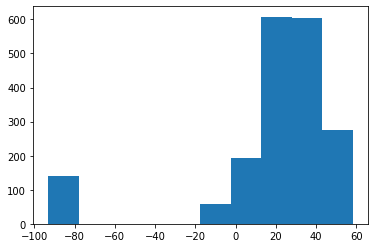

In [24]:
plt.hist(data.Var_11, bins=10)

In [25]:
data[data.Var_11 < 2.7]

,Var_1,Var_2,Var_3,Var_4,Var_5_Class_1,Var_5_Class_2,Var_5_Class_3,Var_5_Class_4,Var_5_Class_5,Var_5_Class_6,Var_5_Class_7,Var_5_Class_8,Var_6_Class_1,Var_6_Class_2,Var_6_Class_3,Var_6_Class_4,Var_6_Class_5,Var_6_Class_6,Var_6_Class_7,Var_6_Class_8,Var_6_Class_9,Var_6_Class_10,Var_6_Class_11,Var_6_Class_12,Var_7,Var_8,Var_9,Var_10,Var_11,Var_12,Var_13,Input_Data_Set_2
0,4.795832,1.043455,1.817121,15.411202,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0.0,0,0,-2.068304,-19.395544,3,0.0
6,4.472136,1.582866,2.289428,13.893166,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0,-2.068304,-19.395544,4,0.0
7,3.605551,1.423841,3.332222,14.472678,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0.0,0,0,-2.068304,-19.395544,4,0.0
19,4.795832,1.424320,1.587401,14.471311,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0,0,0,-93.115105,-77.931134,6,0.0
26,4.472136,1.463583,1.817121,13.708608,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0.0,0,0,-2.873194,27.226635,13,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1871,4.123106,1.333163,1.709976,14.722678,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1.0,1,0,-2.873194,27.226635,13,1.0
1872,4.472136,1.398672,1.817121,14.453305,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0,0,0,-2.873194,27.226635,13,1.0
1873,4.472136,1.395250,1.259921,14.517662,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0,0,0,-2.873194,27.226635,13,1.0
1874,4.472136,1.982505,2.289428,12.353234,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0.0,0,0,-2.873194,27.226635,13,1.0


In [26]:
data_skewness(data)

Var_1 :   -0.23100685320649078
Var_2 :   0.7010179545114352
Var_3 :   0.699391956945575
Var_4 :   -2.1964229147163925
Var_7 :   3.716602153536918
Var_8 :   0.6191884323010302
Var_11 :   -2.115552500477735
Var_12 :   -1.0168136014493985
Var_13 :   -0.2993238501095959


In [27]:
data["Var_4"] = np.power(data["Var_4"], 6)

In [28]:
#data["Var_11"] = np.log(data["Var_11"])
#data["Var_12"] = np.power(data["Var_12"], 3)

In [29]:
#data["Var_12"] = np.power(data["Var_12"], 3)

In [30]:
data_skewness(data)

Var_1 :   -0.23100685320649078
Var_2 :   0.7010179545114352
Var_3 :   0.699391956945575
Var_4 :   -0.34561398441081476
Var_7 :   3.716602153536918
Var_8 :   0.6191884323010302
Var_11 :   -2.115552500477735
Var_12 :   -1.0168136014493985
Var_13 :   -0.2993238501095959


In [31]:
#data.Var_7.describe()
data.Var_11.isna().sum()

0

# Model Building
We are building RandomForest model as it is less impacted by outliers

In [32]:
model_data = data

In [33]:
# After model building, we identified various features which were less important to model building. So we removed those. 

#model_data = data.drop(['Var_5_Class_5', 'Var_10'], axis=1)

We will be using two ways to test out model:
- Train test split
- Cross Validation

In [34]:
# Segregating data in independent and dependent variables

X = model_data.drop(['Input_Data_Set_2'], axis=1)
y = model_data['Input_Data_Set_2']

In [35]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=122, stratify = y)

In [36]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from numpy import mean


# Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=11, random_state=50)

In [38]:
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(rf_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize performance
print('Accuracy %.3f' % mean(scores))

Accuracy 0.894


In [39]:
# Fitting a single model using train test split
rf_model.fit(train_X, train_y)

rf_predicted_test = rf_model.predict(test_X)
accuracy_rf = accuracy_score(rf_predicted_test, test_y)
accuracy_rf

0.8720682302771855

In [40]:
# Checking feature importance to identify features that can be eliminated.
feature_importance_rf = pd.Series(rf_model.feature_importances_, index=train_X.columns)

feature_importance_rf = feature_importance_rf.sort_values(ascending=False)

feature_importance_rf

Var_4             0.145996
Var_2             0.140671
Var_3             0.138810
Var_1             0.108266
Var_13            0.071527
Var_11            0.056023
Var_8             0.048841
Var_12            0.043898
Var_9             0.028058
Var_7             0.022298
Var_5_Class_8     0.020573
Var_6_Class_8     0.015858
Var_6_Class_6     0.015252
Var_6_Class_10    0.014306
Var_6_Class_7     0.013620
Var_6_Class_1     0.012958
Var_6_Class_3     0.012818
Var_6_Class_4     0.011545
Var_6_Class_5     0.011412
Var_6_Class_12    0.010935
Var_6_Class_11    0.010805
Var_5_Class_7     0.010778
Var_6_Class_2     0.010161
Var_6_Class_9     0.010125
Var_5_Class_6     0.005467
Var_5_Class_2     0.004007
Var_5_Class_4     0.002377
Var_5_Class_3     0.001365
Var_5_Class_1     0.001249
Var_10            0.000000
Var_5_Class_5     0.000000
dtype: float64

## Prediction
model_name = rf_model

In [41]:
predicted_data = pd.read_csv("v2_Inputs_for_Full_Predictions_2_imputed.csv")

In [42]:
data_skewness(predicted_data)

Var_1 :   3.9019749056127604
Var_2 :   1.2858898594763082
Var_3 :   18.706620448485587
Var_4 :   -1.2845748252297855
Var_7 :   39.22619102899415
Var_8 :   9.884109368629714
Var_11 :   2.1315514044847115
Var_12 :   -1.5936186845180886
Var_13 :   -0.13667133273249232


In [43]:
# Removing skewness. Taking root for positive skewed data and power for negatively skewed data
predicted_data["Var_1"] = np.sqrt(predicted_data["Var_1"])
predicted_data["Var_2"] = np.sqrt(predicted_data["Var_2"])
predicted_data["Var_3"] = np.cbrt(predicted_data["Var_3"])
predicted_data["Var_7"] = np.cbrt(predicted_data["Var_7"])
predicted_data["Var_8"] = np.cbrt(predicted_data["Var_8"])


In [48]:
data_skewness(predicted_data)

Var_1 :   0.49872883873460444
Var_2 :   0.3576557463036899
Var_3 :   0.9441237516931893
Var_4 :   -1.2845748252297855
Var_7 :   3.942982610036619
Var_8 :   0.3741561309053679
Var_11 :   2.1315514044847115
Var_12 :   -1.5936186845180886
Var_13 :   -0.13667133273249232


In [49]:
model_data = predicted_data

In [50]:
predictions = rf_model.predict(model_data)

In [51]:
predictions_probability = rf_model.predict_proba(model_data)

In [52]:
predictions_probability_0 = predictions_probability[:,0]

In [53]:
prediction_confidence = []
for i in predictions_probability_0:
    if (i > 0.7):
        prediction_confidence.append(0)
    elif (i < 0.3):
        prediction_confidence.append(100)
    else:
        prediction_confidence.append(50)
        


In [54]:
output_file_df = pd.DataFrame({
    "DataSet": 1,
    "PredictionSet": 2,
    "Prediction": predictions,
   # "Pred_proba_0": predictions_probability_0,
   # "Pred_proba_1": predictions_probability_1,
    "Confidence": prediction_confidence
})

In [55]:
output_file_df.to_csv("Final_File_DS1_Pred2.csv", index=False)